# Data Cleaning and Visualization Examples

In [9]:
import pandas as pd
import json
import time
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math
from sqlalchemy import create_engine
import mysql.connector

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Read in the most recent dataframe (locally) and reduce to needed fields

matches = pd.read_pickle('/Users/christophermarker/Documents/Pipeline_sample/assets/master_match_list')

matches = matches[['dire_name', 'match_id', 'radiant_name', 'radiant_win']]

In [121]:
# Read in the most recent datafram from AWS MySQL server

import mysql.connector as sql

db_connection = sql.connect(host='opendota.cvujeq1nc3sk.us-east-1.rds.amazonaws.com', database='opendota', user='chriscdm', password='Munky7!!!')

matches = pd.read_sql('SELECT * FROM 1552320353_match_list', con=db_connection)



In [122]:
# Change the radiant_win field to boolean type

matches['radiant_win'] = matches['radiant_win'].astype(bool)

In [123]:
matches.head()

,dire_name,match_id,radiant_name,radiant_win
0,MONERA,4519896063,496 Gaming,True
1,Guardian Gaming,4519687608,Guardian Gaming2,False
2,YOSHIMOTO.DETONATOR,4519527039,Aura,False
3,YOSHIMOTO.DETONATOR,4519253725,Aura,False
4,Neon Esports,4519210573,Team HighGround,False


# Showing professional teams with the most wins

In [124]:
# Create a column with the winning team

matches['winning_team'] = [matches.loc[ i , : ][2] if matches.loc[ i , : ][3] == True else 
                           matches.loc[ i , : ][0] for i in matches.index]

In [125]:
# A function to return a dataframe containing the team with the most wins in a given subset of matches

def Most_Wins(matches=matches, n=10, g=matches.shape[0]):
    
    if g == matches.shape[0]:
        matches2 = matches
    else:
        matches2 = matches.head(g)

    mw = pd.DataFrame(matches2['winning_team'][matches2['winning_team'] != ''].value_counts())
    mw.index.rename('Team Name', inplace=True)
    mw.rename(columns={'winning_team':'# of wins'}, inplace=True)
    mw.reset_index(inplace = True)

    return mw.head(n)

In [126]:
# running the function with standard inputs
# (returns the 10 teams with all time most wins)

Most_Wins()

,Team Name,# of wins
0,Team Empire,1128
1,PSG.LGD,1083
2,Virtus.pro,1077
3,Evil Geniuses,976
4,\tVici Gaming,953
5,INVICTUS GAMING,939
6,Natus Vincere,900
7,Alliance,878
8,Fnatic,870
9,Newbee,829


In [132]:
# running the function with custom inputs
# (returns the 5 teams with the most wins in the last 500 professional matches)

Most_Wins(matches,5,500)

,Team Name,# of wins
0,KEEN GAMING,18
1,TNC Predator,14
2,TEAM UKRAINE,10
3,NoLifer5,9
4,\tVici Gaming,9


# Creating a chart showing the win differential between radiant and dire side

In [133]:
# Create a function to plot the wins in a given subset of matches

def Plot_Wins(matches=matches, x=matches.shape[0]):
    
    matches1 = matches.head(x)

    wincounts = matches1['radiant_win'].value_counts().sort_index().plot(kind='bar')

    bars = ['Dire Win', 'Radiant Win']
    y_pos = np.arange(len(bars))
    plt.xticks(y_pos, bars, rotation='horizontal')
    x1,x2,y1,y2 = wincounts.axis()

    t = matches1['radiant_win'].count()
    for p in wincounts.patches:
        wincounts.annotate(str(p.get_height()), (p.get_x() +.1, p.get_height() - (p.get_height() * .5)), weight='bold')
        wincounts.annotate(str(round((p.get_height() / t * 100), 2)) + '%', 
                           (p.get_x() +.1, p.get_height() - ((p.get_height() * .50) + (.05 * y2))), weight='bold')
        
    if x == matches.shape[0]:
        n = ''
    else:
        n = ' (' + str(matches1.shape[0]) + ' most recent matches)'
    
    plt.ylabel('# of Wins', fontweight='bold', fontsize='10', horizontalalignment='center')
    plt.title('Radiant vs. Dire Side Wins' + n,  fontweight='bold', fontsize='12', horizontalalignment='center')

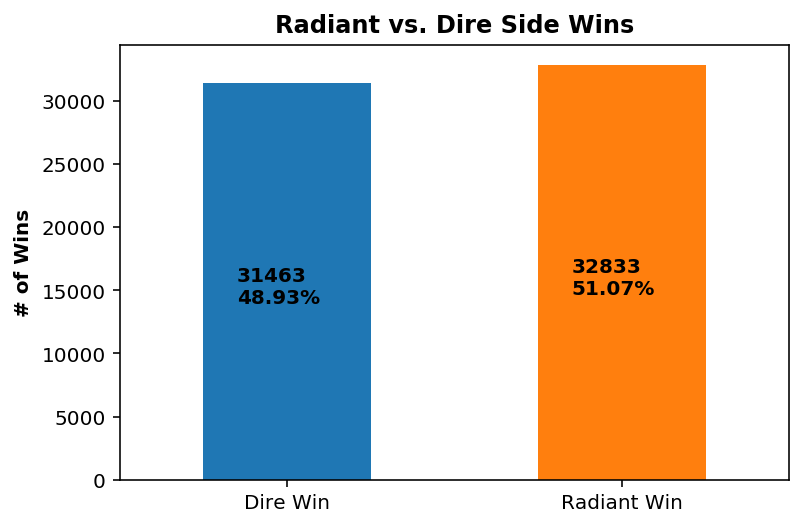

In [134]:
# Running the fucntion with standard inputs
# (gives a bar chart including all professional matches)

Plot_Wins()

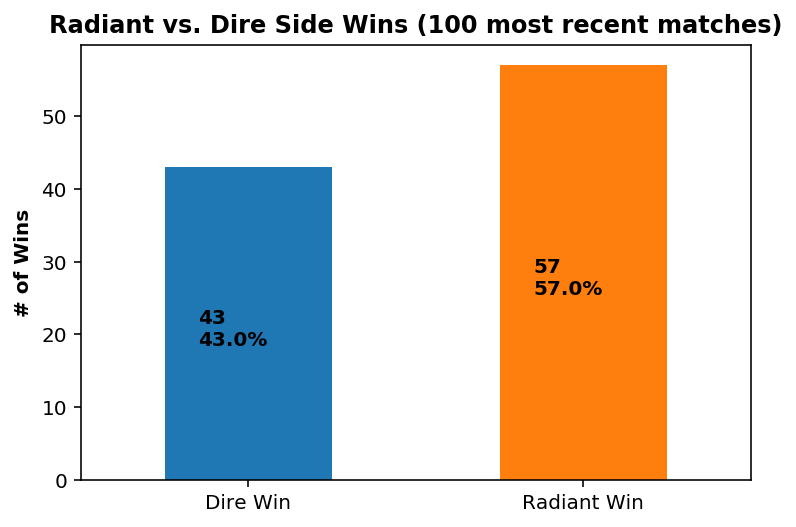

In [135]:
# Running the function with custom inputs
# (gives a bar chart only including the most recent 100 professional matches)

Plot_Wins(matches,100)